# 1.관련 패키지 설치하기

In [8]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

# 2.단어 온톨로지 사전 불러오기

In [9]:
import pandas as pd
df_dic = pd.read_excel('./data/ontology/ontology.xlsx')
# C:\Users\채가은\Downloads\BDA2023\BDA2023\data\ontology
print(df_dic[:100])

    단어 클래스
0   강의  강의
1   수업  강의
2   내용  강의
3   교양  강의
4   재밌  강의
..  ..  ..
95  과제  과제
96  대체  과제
97  발표  과제
98  팀플  과제
99  제출  과제

[100 rows x 2 columns]


In [10]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG']
{'시험', '과제', '강의', '교수', '성적'}


In [11]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

    단어 클래스    품사태깅
0   강의  강의  강의/NNG
1   수업  강의  수업/NNG
2   내용  강의  내용/NNG
3   교양  강의  교양/NNG
4   재밌  강의   재밌/VA
..  ..  ..     ...
95  과제  과제  과제/NNG
96  대체  과제  대체/MAG
97  발표  과제  발표/NNG
98  팀플  과제  팀플/NNG
99  제출  과제  제출/NNG

[100 rows x 3 columns]
['시험', '과제', '강의', '교수', '성적']


In [12]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

시험
['시험/NNG', '나오/VV', '기말/NNG', '중간/NNG', '문제/NNG', '공부/NNG', '외우/VV', '소스/NNG', '퀴즈/NNG', '북/NNG', '오픈/NNG', '범위/NNG', '서술/NNG', '만점/NNG', '암기/NNG', '준비/NNG', '중간고사/NNG', '기말고사/NNG', '맞/VV', '푸/NNP', '지필/NNG', '지엽/NNG', '객관식/NNG', '출제/NNG', '시험공부/NNG', '맞추/VV', '달달/MAG', '틀리/VA', '채점/NNG']
과제
['과제/NNG', '대체/MAG', '발표/NNG', '팀플/NNG', '제출/NNG', '토론/NNG', '조/NNP', '보고서/NNG', '매주/MAG', '개인/NNG', '팀/NNG', '레포트/NNG', '주제/NNG', '프로젝트/NNG', '에세이/NNG', '감상문/NNG', '페이지/NNG', '팀원/NNG', '조별/NNG', '모임/NNG', '비평/NNG', '조원/NNG', '기획/NNG', '계획서/NNG', '서평/NNG', '활동/NNG']
강의
['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG', '모르/VV', '관심/NNG', '이해/NNG', '꿀/NNG', '본인/NNG', '수강/NNG', '흥미/NNG', '자신/NNG', '재미있/VA', '역사/NNG', '철학/NNG', '괜찮/VA', '지식/NNG', '신청/NNG', '좋아하/VV', '만족/NNG', '도움/NNG', '전공/NNG', '대학/NNG', '최고/NNG', '문학/NNG', '계절/NNG', '인생/NNG', '아쉽/VA-I', '관점/NNG', '걱정/NNG', '단점/NNG', '빡세/VA', '학교/NNG', '피하/NNG', '졸업/NNG', '인정/NNG', '아주대/NNP', '수학/NN

In [13]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'강의/NNG': '강의', '수업/NNG': '강의', '내용/NNG': '강의', '교양/NNG': '강의', '재밌/VA': '강의', '과목/NNG': '강의', '학기/NNG': '강의', '추천/NNG': '강의', '사람/NNG': '강의', '배우/NNG': '강의', '모르/VV': '강의', '관심/NNG': '강의', '이해/NNG': '강의', '꿀/NNG': '강의', '본인/NNG': '강의', '수강/NNG': '강의', '흥미/NNG': '강의', '자신/NNG': '강의', '재미있/VA': '강의', '역사/NNG': '강의', '철학/NNG': '강의', '괜찮/VA': '강의', '지식/NNG': '강의', '신청/NNG': '강의', '좋아하/VV': '강의', '만족/NNG': '강의', '도움/NNG': '강의', '전공/NNG': '강의', '대학/NNG': '강의', '최고/NNG': '강의', '문학/NNG': '강의', '계절/NNG': '강의', '인생/NNG': '강의', '아쉽/VA-I': '강의', '관점/NNG': '강의', '걱정/NNG': '강의', '단점/NNG': '강의', '빡세/VA': '강의', '학교/NNG': '강의', '피하/NNG': '강의', '졸업/NNG': '강의', '인정/NNG': '강의', '아주대/NNP': '강의', '수학/NNG': '강의', '이과/NNG': '강의', '온라인/NNG': '강의', '아깝/VA-I': '강의', '싫/VA': '강의', '미술/NNG': '강의', '기회/NNG': '강의', '필수/NNG': '강의', '추가/NNG': '강의', '지각/NNG': '강의', '줌/MAG': '강의', '정치/NNG': '강의', '장점/NNG': '강의', '언어/NNG': '강의', '새롭/VA-I': '강의', '문과/NNG': '강의', '따라가/VV': '교수', '고전/NNG': '강의', '고등학교/NNG': '강의', '학습/NNG'

# 3. 말뭉치 데이터 불러오기

In [14]:
# 데이터 불러오기
import re

fileDir = "./data/Science.txt"
fr = open(fileDir, 'rt', encoding='UTF8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

지루한거 빼고는 괜찮은데 시험이 내신급으로 나옴
전 좋았습니다 관심있는 분야라면 새로운 시각을 배울 수 있어서 좋았습니다
세포속 시그니쳐 점점 어려워져요 생긱보다 얻는게 없는
진짜 재미없음 대충 지적설계론 지적인 존재가 생명 창조했다 에 대한 수업임 그냥 굳이 이걸 왜 듣지 싶은
배우는건 잘 모르겠는데 신경쓸건 많이 없어요 시험때 강의노트 잘보세요
아주대에 실용주의는 죽었다 이 과목이 열려있는 한은 말이지
별다르게 특별히 배운 내용은 없음 비디오 강의 잘 보고 팀플 무난하게 잘 넘어가면 어느정도 비슷히게 점수 받는 듯 대신 수업이 좀 졸려서 감안해야함 기말 시험이랑 퀴즈 있었는데 난이도가 강의노트에서 거의 다 나오는 형식이라 거의 오프북 왔다갔다 눈으로 보면서 풀면 됨 성적은 잘 나왔는데 어떤 기준인지는 모르겠음
성적 너그러우심 다만 수업 들으면서 뭐가 남는다는 생각 한번도 안함 지적설계론 수업이라서 교재 읽다보면 해괴해질때가 있는데 옮긴이도 교수님이고 걍 그렇구나 하면 됨 다시 수강신청 수강정정기간으로 돌아간다면 안할듯
중간 퀴즈 한번 기말 시험 한번이지만 다행히 퀴즈는 성적 반영이 안되고 기말 시험의 형식을 프리뷰하는 형태로 다루어짐 팀플 발표가 한 번 있긴 하지만 진짜로 무성의하게만 안하면 평가 비중은 다들 비슷하게 받아가는 듯 이 말인즉슨 기말만 잘보고 출석만 성실히 하면 학점 따기는 쉽다는 것인데 강의 주제가 상당히 호불호 갈릴만한 내용을 다루므로 주의하길 바람 필자는 그냥 아무 생각없이 강의 들었지만 받았는데 그 과정에서 배움의 의미로써는 남은게 없는 것 같음
시험도 있고 성의없는 비디오 강의에 마구잡이로 써놓은 자료와 발표수업까지 다른 교양 냅두고 이걸 왜 들었을까 하
정말 등록금이 아깝지만 너무 적성과 맞지 않아 새학기 일주일 정도만 수업을 듣고 그 뒤로는 틀어두고 잠만 자며 과제만 죽어라 해냈다 과제도 그리 어려운 편은 아니었으며 책에서 찾으면 되는 것이라 어느정도의 필력만 갖추면 됐음 중간고사 없는 거 너무 좋았고 기말공부는 당일 날 한시간 

In [15]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""


for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "VV" in eachOut[1] or "VA" in eachOut[1] or "NN" in eachOut[1] or "MA" in eachOut[1]:
                resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
                
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['지루하/VA', '거/NNB', '빼/VV', '괜찮/VA', '시험/NNG', '내신/NNG', '급/NNG', '나오/VV', '좋/VA', '관심/NNG', '있/VV', '분야/NNG', '새롭/VA-I', '시각/NNG', '배우/VV', '수/NNB', '있/VA', '좋/VA', '세포/NNG', '속/NNG']
['지루하/VA', '지루하/VA', '거/NNB', '빼/VV', '빼/VV', '빼/VV', '괜찮/VA', '괜찮/VA', '시험/NNG', '시험/NNG', '내신/NNG', '급/NNG', '급/NNG', '나오/VV', '나오/VV', '나오/VV', '나오/VV', '좋/VA', '좋/VA', '좋/VA']
{'의견/NNG', '켜/VV', '이끌/VV', '희생/NNG', '종합/NNG', '무지/MAG', '뒷부분/NNG', '뢴트겔/NNG', '차례/NNG', '복습/NNG', '평로/NNP', '뒷장/NNG', '뺐겼/NNG', '익히/VV', '걱정/NNG', '연도/NNG', '아님/MAJ', '빠지/VV', '학년/NNG', '진짜로/MAG', '무려/MAG', '기다리/VV', '특별히/MAG', '놀래/VV', '숨기/VV', '기계/NNG', '에이/NNG', '속상하/VA', '흐르/VV', '온라인/NNG', '쓰기임/NNG', '앞/NNG', '다만/MAJ', '오프/NNG', '내심/NNG', '퇴근/NNG', '전공자/NNG', '적응/NNG', '제/NNG', '클로즈/NNG', '차근차근/MAG', '같이/MAG', '만족도/NNG', '순전히/MAG', '나/VV', '열리/VV', '도움/NNG', '곳/NNG', '제외/NNG', '어렵/VA-I', '인/NNP', '볼수있습니나/NNG', '서버/NNG', '수능/NNG', '형태/NNG', '자세히/MAG', '딱히/MAG', '개똥/NNG', '느끼/VV', '뚫리/VV', '깎이/VV', '좌우/NNG', '가치/NNG', '마무리

# 4. 말뭉치 사용 빈도 기반 시각화 하기

## 4-1 전체 데이터 사용하기

<Axes: xlabel='n', ylabel='word'>

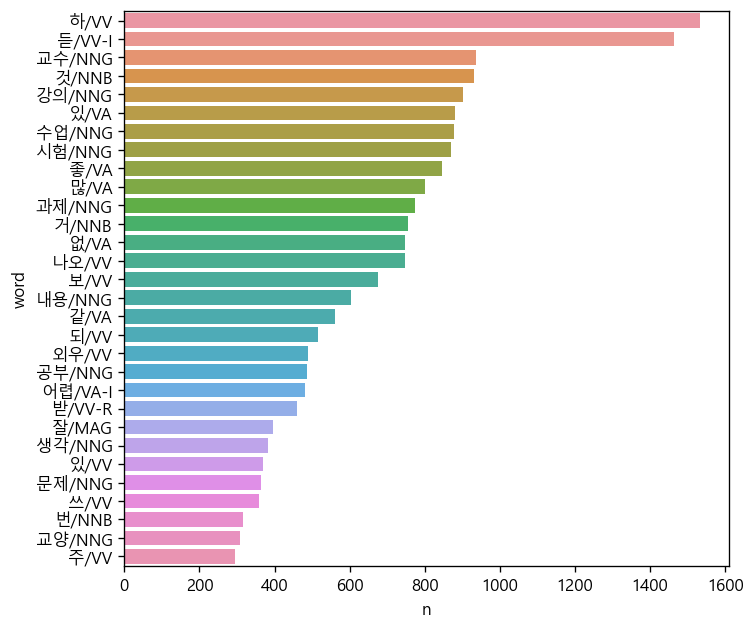

In [16]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSAll})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

#plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')


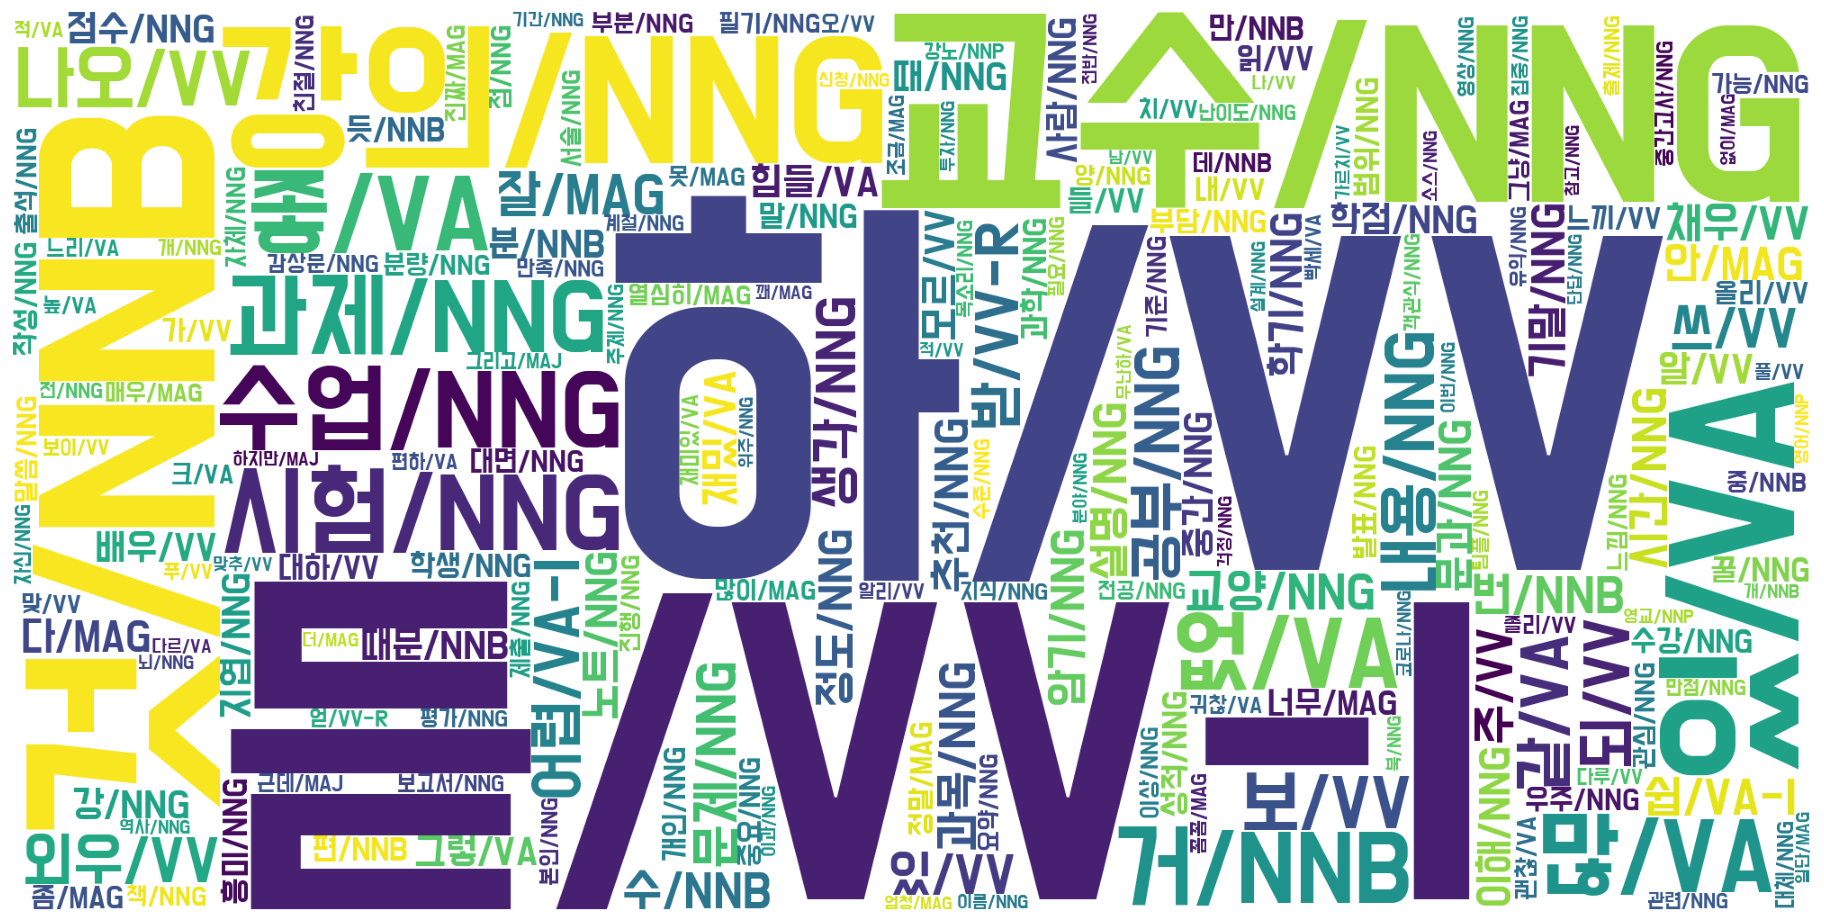

In [17]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-2 문맥 단어만 사용하기

<Axes: xlabel='n', ylabel='word'>

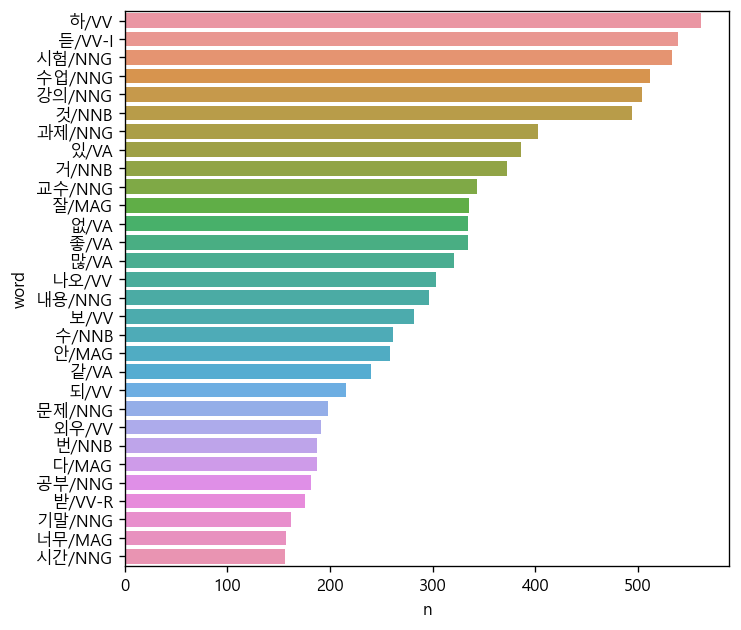

In [18]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

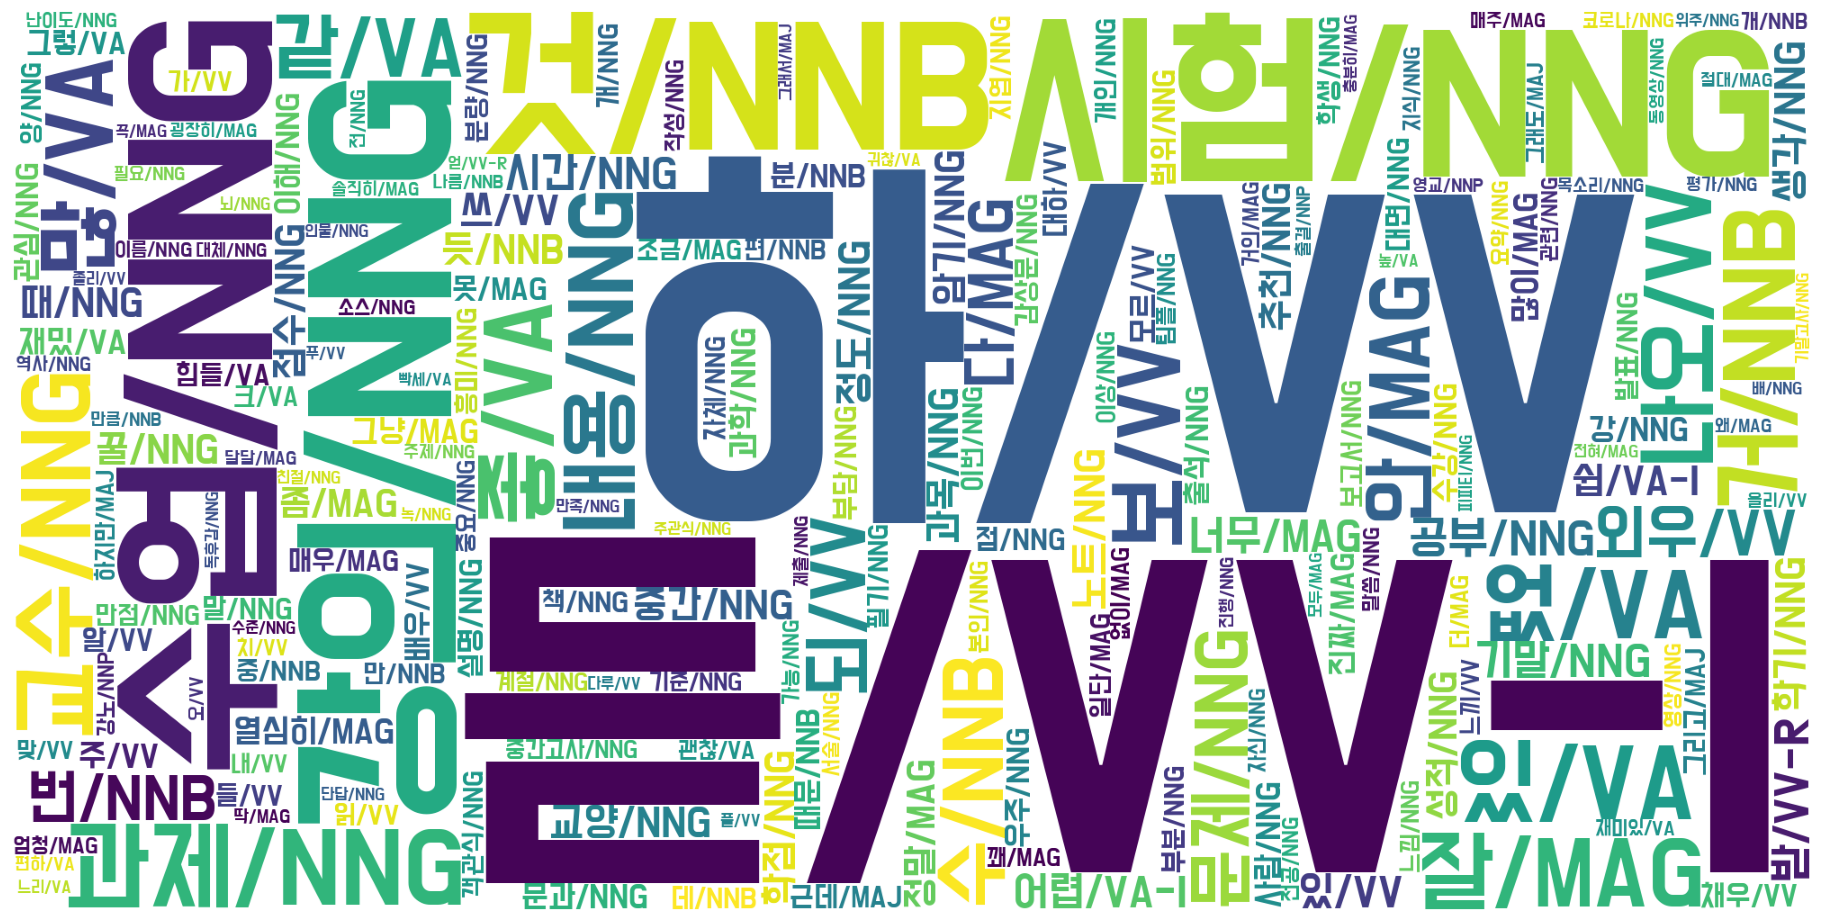

In [19]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-3 문맥 안에서 단어 사용 확인하기

In [20]:
from nltk import *
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(sentencePOSTextAll))
text.concordance("강의")

Displaying 25 of 504 matches:
거 ᆫ 잘 모르 겠 는데 신경 쓰 ᆯ 거 ᆫ 많이 없 어요 시험 때 강의 노트 잘 보 세요 아주대 에 실용주의 는 죽 었 다 이 과목 이 열
한 은 말 이 지 별다르 게 특별히 배우 ᆫ 내용 은 없 음 비디오 강의 잘 보 고 팀플 무난 하 게 잘 넘어가 면 어느 정도 비슷 히 게 
감안 하 어야 하 ᆷ 기 말 시험 이랑 퀴즈 있 었 는데 난이도 가 강의 노트 에서 거의 다 나오 는 형식 이 라 거의 오프 북 왔다갔다 눈
 다루 므로 주의 하 기 ᆯ 바라 ᆷ 필자 는 그냥 아무 생각 없이 강의 듣 었 지만 받 었 는데 그 과정 에서 배우 ᆷ 의 의미 로써 는 
남 은 것 이 없 는 것 같 음 시험 도 있 고 성의 없 는 비디오 강의 에 마구잡이 로 쓰 어 놓 은 자료 와 발표 수업 까지 다른 교양 
학기 이 ᆫ 것 같 네요 재밌 지 도 않 고 유익 하 지 도 않 은 강의 차라리 다른 과목 을 듣 으시 는 거 ᆯ 추천 드리 ᆷ 강의 력 베
않 은 강의 차라리 다른 과목 을 듣 으시 는 거 ᆯ 추천 드리 ᆷ 강의 력 베드 진짜 말씀 이 느리 세요 재미 도 없 고 비디오 강의 가 
 ᆷ 강의 력 베드 진짜 말씀 이 느리 세요 재미 도 없 고 비디오 강의 가 주일 마다 삭제 되 고 팀플 한 번 있 음 교양 이 라도 유익 
짜 졸리 ᆷ 과학 교양 듣 기 는 무난 하 ᆫ 과목 이 ᆸ니다 다만 강의 가 매우 지루하 ᆸ니다 기말 고사 만 잘 보 면 에이플 나오 어요 
우 지루하 ᆸ니다 기말 고사 만 잘 보 면 에이플 나오 어요 개 꿀 강의 교수 님 이 나이 가 있 으시 고 그러 시 어서 유익 하 ᆫ 수업 
 이 라 수업 집중 이 안 되 ᆸ니다 피피티 도 제공 되 는 것 과 강의 에서 사용 하 는 것 이 약간 씩 다르 어서 헷갈리 어요 강의 는 
 과 강의 에서 사용 하 는 것 이 약간 씩 다르 어서 헷갈리 어요 강의 는 배 속 이 기본 속도 이 라 생각 하 시 면 편하 고 저 가 시
문 에 개인 과제 로 변경 시험 이 지엽

In [21]:
text.concordance("성적")

Displaying 25 of 105 matches:
형식 이 라 거의 오프 북 왔다갔다 눈 으로 보 면서 풀 면 되 ᆷ 성적 은 잘 나오 었 는데 어떤 기준 이 ᆫ지 는 모르 겠 음 성적 너그
 ᆷ 성적 은 잘 나오 었 는데 어떤 기준 이 ᆫ지 는 모르 겠 음 성적 너그럽 으시 ᆷ 다만 수업 듣 으면서 뭐 가 남 는다는 생각 한 번
 수업 을 듣 을 수 있 고 팀플 있 음 그러나 기말 만 잘 보 면 성적 잘 주 시 기 때문 에 나름 꿀 강 이 라고 생각 하 ᆷ 수업 은 
시 고 그러 시 어서 유익 하 ᆫ 수업 이 ᆫ지 는 잘 모르 겠 음 성적 결산 전 이 라 성적 은 사실 잘 모르곘네요 교수 님 이 알 는 거
유익 하 ᆫ 수업 이 ᆫ지 는 잘 모르 겠 음 성적 결산 전 이 라 성적 은 사실 잘 모르곘네요 교수 님 이 알 는 거 ᆫ 많 으시 ᆫ데 설
용 에 관심 이 있 는 학생 은 듣 기 좋 음 하지만 과제 와 기말 성적 은 아예 알 ᆯ 수 없 음 기말 치 고 얼마 지나 지 않 어 성적 
 성적 은 아예 알 ᆯ 수 없 음 기말 치 고 얼마 지나 지 않 어 성적 뜸 과제 기말 시험 원래 조별 과제 가 있 지만 코로나 때문 에 개
자신 을 변화 시키 시 ᆯ 필요 가 있 는 것 같 습니다 아직 최종 성적 이 나오 기 전 이 라서 성적 을 잘 주 시 는 편 이 시 ᆫ 지 
 가 있 는 것 같 습니다 아직 최종 성적 이 나오 기 전 이 라서 성적 을 잘 주 시 는 편 이 시 ᆫ 지 는 잘 모르 겠 습니다 저 는 
모르 겠 습니다 저 는 객관 적 이 ᆫ 강평 작성 을 위하 어 최종 성적 이 나오 기 전 에 강의 평 을 작성 하 ᆸ니다 그럼 이만 왜 자꾸
미없 지만 과제 도 부담 스럽 지 않 었 고 기말 조지 었 는데 도 성적 잘 주 시 었 음 원어 강의 이 지만 교수 님 말 하 시 는 것 이
면 공유 로 띄우 고 당신 께서 스크롤 로 내리 는 방식 이 었 음 성적 은 굉장히 던지 었 다고 생각 하 었 지만 나름 잘 주심 열심히 하
히 던지 었 다고 생각 하 었 지만 나름

In [22]:
text.concordance("과제")

Displaying 25 of 403 matches:
정도 만 수업 을 듣 고 그 뒤 로 는 틀 어 두 고 잠 만 자 며 과제 만 죽 어라 하 어 내 었 다 과제 도 그리 어렵 은 편 은 아니 
는 틀 어 두 고 잠 만 자 며 과제 만 죽 어라 하 어 내 었 다 과제 도 그리 어렵 은 편 은 아니 었 으며 책 에서 찾 으면 되 는 것
미있 게 듣 을 수 있 습니다 그리고 코로나 이 라 팀플 대신 개인 과제 로 바뀌 었 던 점 도 좋 었 습니다 특이 하 ᆫ 내용 이 라 괜찮
배속 하 어야 듣 을 만 하 고 수업 끝나 고 정치 얘기 하 ᆸ니다 과제 와 시험 점수 를 알 ᆯ 수 없 어서 이상 하 ᆸ니다 내용 에 관심
 하 ᆸ니다 내용 에 관심 이 있 는 학생 은 듣 기 좋 음 하지만 과제 와 기말 성적 은 아예 알 ᆯ 수 없 음 기말 치 고 얼마 지나 지
 아예 알 ᆯ 수 없 음 기말 치 고 얼마 지나 지 않 어 성적 뜸 과제 기말 시험 원래 조별 과제 가 있 지만 코로나 때문 에 개인 과제 
말 치 고 얼마 지나 지 않 어 성적 뜸 과제 기말 시험 원래 조별 과제 가 있 지만 코로나 때문 에 개인 과제 로 변경 시험 이 지엽 적 
 과제 기말 시험 원래 조별 과제 가 있 지만 코로나 때문 에 개인 과제 로 변경 시험 이 지엽 적 으로 나오 기 때문 에 강의 를 꼼꼼히 
 지만 다큐멘터리 를 보 는 느낌 이 라 괜찮 음 일단 적당 하 ᆫ 과제 와 한 번 의 시험 과 그리고 문과 생 들 에게 이 보다 좋 은 영
 것 도 추천 하 ᆸ니다 수업 듣 다가 정신병 걸리 ᆯ 것 같 어서 과제 만 겨우 하 어서 내 었 습니다 실시간 수업 때 엄청나 ᆫ 숫자 의
지만 별로 추천 은 안 하 ᆷ 뭐 딱히 괴롭 지 않 고 적당 하 ᆫ 과제 동영상 강의 는 조금 길 고 말 이 느리 어 듣 기 힘들 지만 그냥
접 내리 어 주 면서 보이 어 주 시 어서 빨리빨리 풀 어야 하 ᆷ 과제 는 별로 없 기 ᆫ 하 었 는데 책 읽 고 요약 하 는 과제 이 ᆷ
하 ᆷ 과제 는 별로 없 기 ᆫ 하 었 

In [23]:
text.concordance("시험")

Displaying 25 of 533 matches:
지루하 ᆫ 거 빼 고 는 괜찮 은데 시험 이 내신 급 으로 나오 ᆷ 저 ᆫ 좋 었 습니다 관심 있 는 분야 
배우 는 거 ᆫ 잘 모르 겠 는데 신경 쓰 ᆯ 거 ᆫ 많이 없 어요 시험 때 강의 노트 잘 보 세요 아주대 에 실용주의 는 죽 었 다 이 과
받 는 듯 대신 수업 이 좀 졸리 어서 감안 하 어야 하 ᆷ 기 말 시험 이랑 퀴즈 있 었 는데 난이도 가 강의 노트 에서 거의 다 나오 는
 정정 기간 으로 돌아가 ᆫ다면 안 하 ᆯ 듯 중간 퀴즈 한번 기말 시험 한 번 이 지만 다행히 퀴즈 는 성 적 반영 이 안 되 고 기말 시
험 한 번 이 지만 다행히 퀴즈 는 성 적 반영 이 안 되 고 기말 시험 의 형식 을 프리뷰 하 는 형태 로 다루 어 지 ᆷ 팀플 발표 가 
정 에서 배우 ᆷ 의 의미 로써 는 남 은 것 이 없 는 것 같 음 시험 도 있 고 성의 없 는 비디오 강의 에 마구잡이 로 쓰 어 놓 은 
 무슨 내용 이 ᆫ지 잘 모르 겠 는데 그냥 필기 좀 하 어 놓 고 시험 때 진짜 스트레스 받 기 는 하 는데 정신 줄 만 안 놓 고 오픈 
의 는 배 속 이 기본 속도 이 라 생각 하 시 면 편하 고 저 가 시험 보 ᆯ 때 는 문제 를 실시간 으로 띄우 어 주 시 어서 스크롤 하
어야 듣 을 만 하 고 수업 끝나 고 정치 얘기 하 ᆸ니다 과제 와 시험 점수 를 알 ᆯ 수 없 어서 이상 하 ᆸ니다 내용 에 관심 이 있 
ᆯ 수 없 음 기말 치 고 얼마 지나 지 않 어 성적 뜸 과제 기말 시험 원래 조별 과제 가 있 지만 코로나 때문 에 개인 과제 로 변경 시
험 원래 조별 과제 가 있 지만 코로나 때문 에 개인 과제 로 변경 시험 이 지엽 적 으로 나오 기 때문 에 강의 를 꼼꼼히 듣 어야 하 ᆷ
 보 는 느낌 이 라 괜찮 음 일단 적당 하 ᆫ 과제 와 한 번 의 시험 과 그리고 문과 생 들 에게 이 보다 좋 은 영교 는 없 는 것 같
는 것 보다 조금 내용 이 빈약 하 ᆫ데 교과서 참고 하 면 되 ᆷ 시험

In [24]:
text.concordance("교수")

Displaying 25 of 343 matches:
 교재 읽 다 보 면 해괴 하 어 지 ᆯ 때 가 있 는데 옮긴이 도 교수 님 이 고 걍 그렇 구나 하 면 되 ᆷ 다시 수강 신청 수강 정정 
루하 ᆸ니다 기말 고사 만 잘 보 면 에이플 나오 어요 개 꿀 강의 교수 님 이 나이 가 있 으시 고 그러 시 어서 유익 하 ᆫ 수업 이 ᆫ
 잘 모르 겠 음 성적 결산 전 이 라 성적 은 사실 잘 모르곘네요 교수 님 이 알 는 거 ᆫ 많 으시 ᆫ데 설명 을 못 하 시 는 느낌 관
 점 도 좋 었 습니다 특이 하 ᆫ 내용 이 라 괜찮 었 어요 다만 교수 님 나이 가 있 으시 어서 좀 지루 하 다는 점 배속 하 어야 듣 
이 지엽 적 으로 나오 기 때문 에 강의 를 꼼꼼히 듣 어야 하 ᆷ 교수 님 말씀 이 느리 어서 매주 고통 스럽 었 음 받 었 지만 굳이 추
고 문과 생 들 에게 이 보다 좋 은 영교 는 없 는 것 같 습니다 교수 님 수업 은 매우 지루 하 고 말 이 매우 느리 시 어서 배속 을 
중립 을 지키 시 지 않 습니다 박식 하 시 고 영어 잘 하 시 는 교수 님 이 ᆷ 에 는 틀리 ᆷ 이 없 으나 좀 더 젊 은 층 학생 과 
다 다큐 보 는 느낌 이 라 안 미루 고 제때 듣 음 강의 자료 는 교수 님 이 말씀 하 시 는 것 보다 조금 내용 이 빈약 하 ᆫ데 교과서
치기 만 집중 하 어서 잘 하 면 좋 은 점수 받 을 수 있 습니다 교수 님 은 좋 으세요 근데 저 는 한 거 에 비 하 어 학점 을 잘 못
 어 보 ᆯ까 이 라며 생각 하 었 던 나 에 대하 어 후회 하 ᆷ 교수 님 의 인간 적 이 ᆫ 면 은 좋 으시 ᆫ 교수 님 이 라 생각 하
하 어 후회 하 ᆷ 교수 님 의 인간 적 이 ᆫ 면 은 좋 으시 ᆫ 교수 님 이 라 생각 하 지만 수업 에 있 어서 는 아니 었 음 연세 가
 책 이 지 ᆫ 짜 어 안 읽히 ᆷ 왜 그렇 은가 하 었 는데 역자 교수 님 이 시 었 음 고등학생 때 하 던 직 독직 하 어 번역 느낌 마
때 시험 문제 파일 을 올리 어 주 시 

# 5.문서 * 온톨로지 클래스 행렬 만들기

## term-document matrix (words-reviews matrix)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:10): https://www.youtube.com/watch?v=xtD47WHNhxk&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=3

In [25]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

      0    1    2    3    4    5    6    7    8    9  ...  2367  2368  2369  \
시험  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
과제  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
강의  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
교수  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
성적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

    2370  2371  2372  2373  2374  2375  2376  
시험   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
과제   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
강의   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
교수   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
성적   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2377 columns]
      0    1    2    3    4    5    6    7    8    9  ...  2367  2368  2369  \
시험  4.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   2.0  15.0   
과제  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

## 행렬 정규화(TF-IDF) 적용하기 -  TF-IDF(Term Frequency-Inverse Document Frequency)

- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:00 - 1:00, 5:00): https://www.youtube.com/watch?v=TBUpxFw8oIA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=5

- tf(d,t) : 각 문서에서의 각 단어의 등장 빈도를 나타내는 값; 
- df(t) : 특정 단어 t가 등장한 문서의 수; 
- idf(d, t) : df(t)에 반비례하는 수; log(n/1+df(t))

In [26]:
import pandas as pd 
from math import log 

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))


In [27]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\채가은\AppData\Local\Temp\ipykernel_19324\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


           0         1    2    3    4         5    6         7         8  \
시험  3.192722  1.596361  0.0  0.0  0.0  0.000000  0.0  0.000000  0.798181   
과제  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
강의  1.741425  2.612138  0.0  0.0  0.0  1.306069  0.0  1.306069  0.435356   
교수  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
성적  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   

           9  ...      2367      2368       2369  2370      2371      2372  \
시험  0.000000  ...  0.000000  1.596361  11.972708   0.0  0.000000  0.000000   
과제  0.000000  ...  0.000000  0.000000   0.000000   0.0  0.000000  0.000000   
강의  0.870713  ...  0.435356  0.435356   0.000000   0.0  0.870713  0.435356   
교수  0.000000  ...  0.000000  0.000000   3.066637   0.0  0.000000  0.000000   
성적  0.000000  ...  0.000000  0.000000   0.000000   0.0  0.000000  0.000000   

        2373      2374      2375      2376  
시험  2.394542  0.000000  0.000

In [28]:
corpus_tfidf_out.to_csv("./data/Science_tfidf_out.csv")  

# 6. 온톨로지 그래프 생성

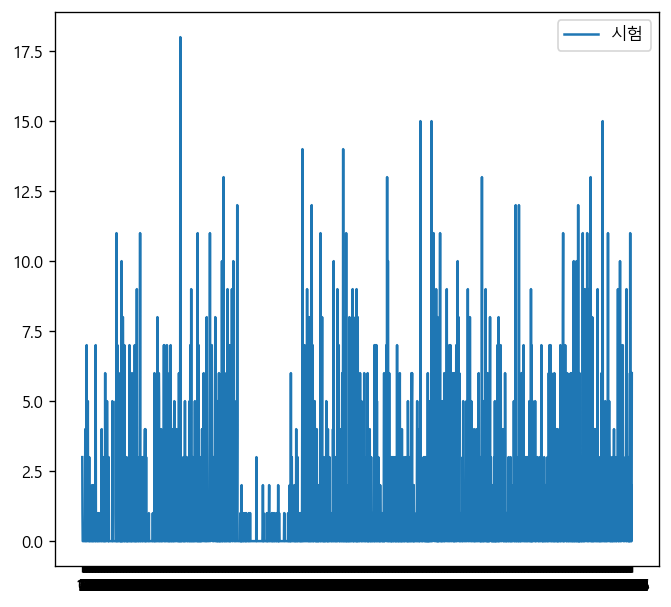

In [29]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
    
targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['시험']))
    
#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '시험')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

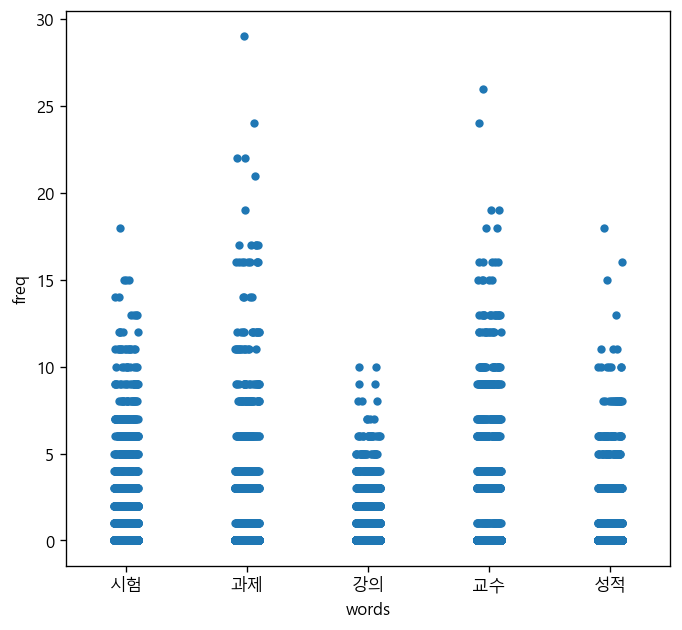

In [30]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF
  
inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

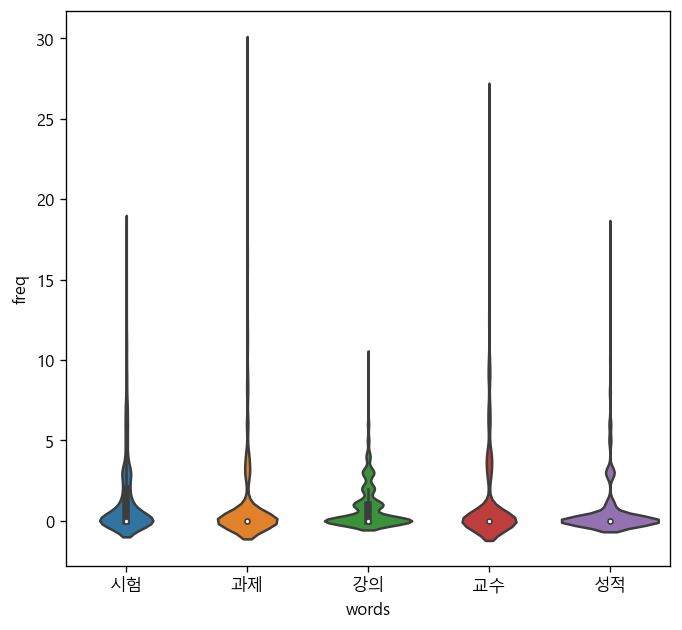

In [31]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

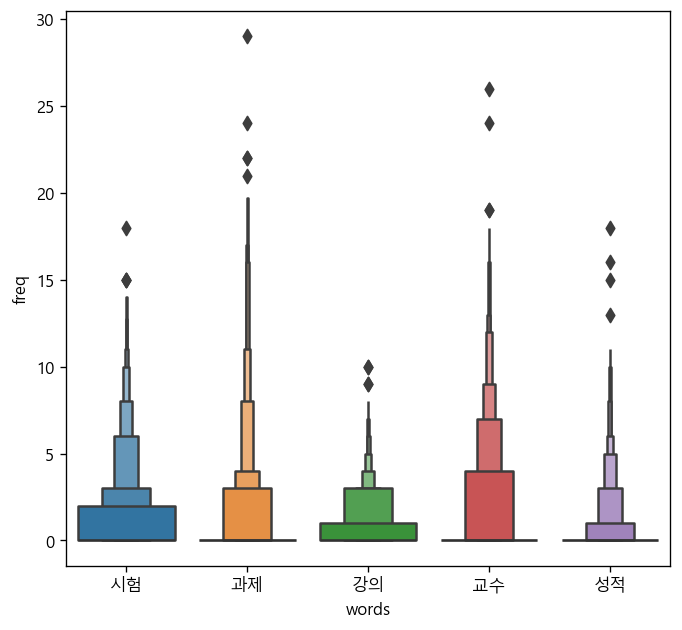

In [32]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)

# 7. 문서별로 온톨로지 정보 확인하기 (e.g., 영역 별 평가 경향 확인하기)

In [39]:
emotions = ['시험', '과제', '강의', '교수', '성적']
lectures = ["역사와 철학","문학과 예술","인간과 사회","자연과 과학"]

lectureDic = dict()

#역사와 철학_인문학1
Humanities_1_tfidf_matrix = pd.read_csv('./data/Humanities_1_tfidf_out.csv', index_col=0)
Humanities_1EmotionMean = []
for i in range(0, len(emotions)):
    Humanities_1EmotionMean.append(Humanities_1_tfidf_matrix.loc[emotions[i]].mean())
print(Humanities_1EmotionMean)
lectureDic["역사와 철학"] = Humanities_1EmotionMean

#문학과 예술_인문학2
Humanities_2_tfidf_matrix = pd.read_csv('./data/Humanities_2_tfidf_out.csv', index_col=0)
Humanities_2EmotionMean = []
for i in range(0, len(emotions)):
    Humanities_2EmotionMean.append(Humanities_2_tfidf_matrix.loc[emotions[i]].mean())
print(Humanities_2EmotionMean)
lectureDic["문학과 예술"] = Humanities_2EmotionMean

#인간과 사회_사회과학
Social_tfidf_matrix = pd.read_csv('./data/Social_tfidf_out.csv', index_col=0)
SocialEmotionMean = []
for i in range(0, len(emotions)):
    SocialEmotionMean.append(Social_tfidf_matrix.loc[emotions[i]].mean())
print(SocialEmotionMean)
lectureDic["인간과 사회"] = SocialEmotionMean

#자연과 과학_자연과학
Science_tfidf_matrix = pd.read_csv('./data/Science_tfidf_out.csv', index_col=0)
ScienceEmotionMean = []
for i in range(0, len(emotions)):
    ScienceEmotionMean.append(Science_tfidf_matrix.loc[emotions[i]].mean())
print(ScienceEmotionMean)
lectureDic["자연과 과학"] = ScienceEmotionMean

lectureDF = pd.DataFrame(lectureDic, index=emotions)
print(lectureDF)

[1.4597651083589822, 1.0770032391221995, 1.2378752903524488, 1.5911898586735225, 0.6976921093173237]
[1.2441450807857424, 1.168923672288319, 1.3124563280716668, 1.5299773561154717, 0.8295293273041843]
[1.4443933075587934, 1.01226569293602, 1.238179344431001, 1.5365559680624747, 0.7541672047875826]
[1.568826033837871, 1.0555932547416542, 1.19104843557712, 1.314641713092994, 0.668234386017614]
      역사와 철학    문학과 예술    인간과 사회    자연과 과학
시험  1.459765  1.244145  1.444393  1.568826
과제  1.077003  1.168924  1.012266  1.055593
강의  1.237875  1.312456  1.238179  1.191048
교수  1.591190  1.529977  1.536556  1.314642
성적  0.697692  0.829529  0.754167  0.668234


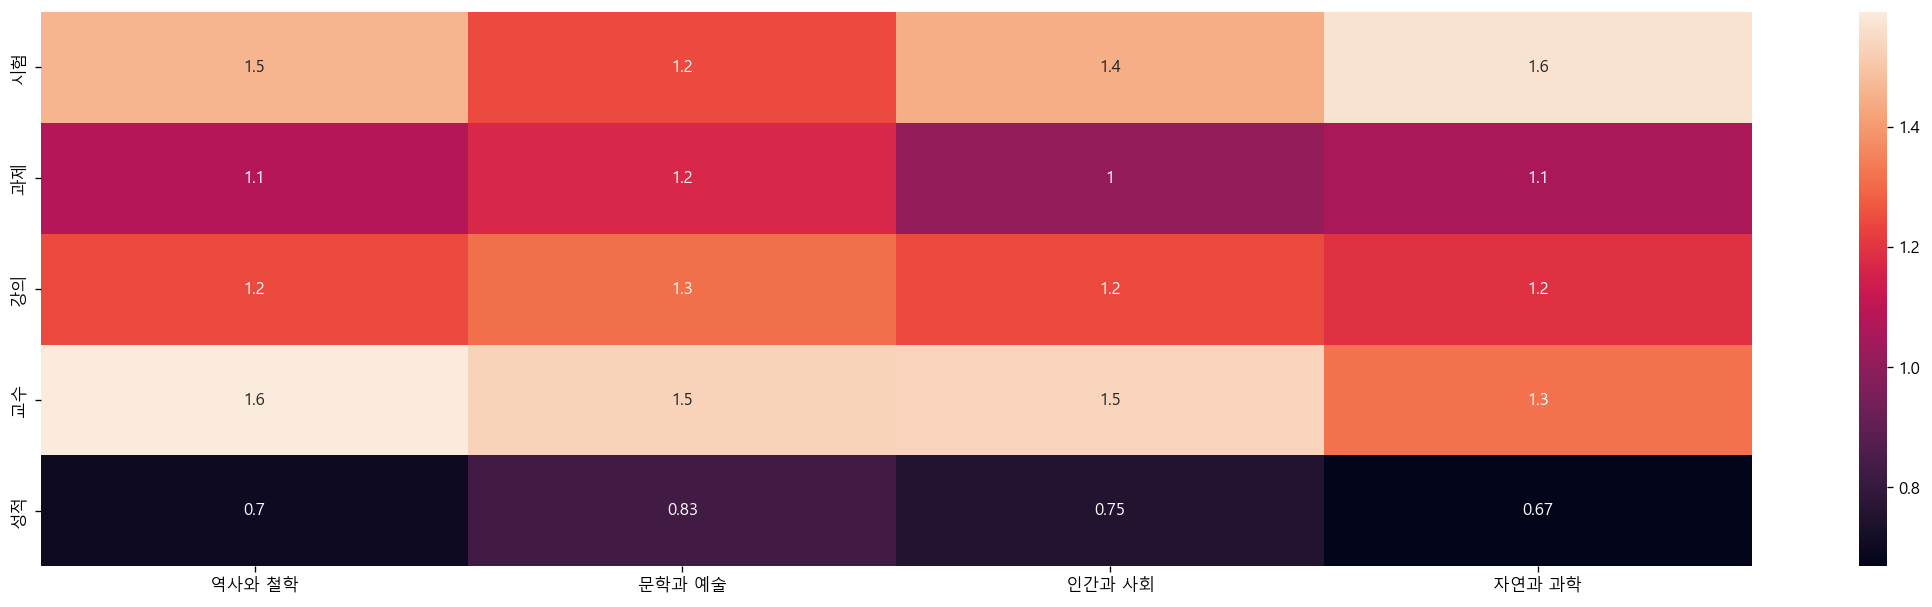

In [40]:
#히트맵로 표현하기
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

plt.figure(figsize=(23, 6))
sns.heatmap(lectureDF, annot=True)
plt.show()

# 8.네트워크 시각화 생성하기

In [41]:
!pip install pyvis

## 네트워크 데이터 만들기
- https://wikidocs.net/24603

## 코사인 유사도(Cosine Similarity)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (2:30): https://www.youtube.com/watch?v=-_i9Cg81rXA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=4

In [46]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

lectures = ["역사와 철학","문학과 예술","인간과 사회","자연과 과학"]

sourceList = []
targetList = []
scoreList = []
for i in range(0,len(lectures)):
    for j in range(0,len(lectures)):
        source = np.array(list(lectureDF.loc[:,lectures[i]]))
        target = np.array(list(lectureDF.loc[:,lectures[j]]))
        score = cos_sim(source, target)
        if 0.95 <= score:
            if lectures[i] != lectures[j]:
                sourceList.append(lectures[i])
                targetList.append(lectures[j])
                scoreList.append(score)
            
lectureNetwork = pd.DataFrame({'source':sourceList, 'target':targetList, 'score':scoreList})
lectureNetwork.to_csv("./data/lectureNetwork.csv")  
print(lectureNetwork)

    source  target     score
0   역사와 철학  문학과 예술  0.994800
1   역사와 철학  인간과 사회  0.999463
2   역사와 철학  자연과 과학  0.994878
3   문학과 예술  역사와 철학  0.994800
4   문학과 예술  인간과 사회  0.995039
5   문학과 예술  자연과 과학  0.986709
6   인간과 사회  역사와 철학  0.999463
7   인간과 사회  문학과 예술  0.995039
8   인간과 사회  자연과 과학  0.995206
9   자연과 과학  역사와 철학  0.994878
10  자연과 과학  문학과 예술  0.986709
11  자연과 과학  인간과 사회  0.995206


In [47]:
#선택과 필터 적용하기
from pyvis.network import Network

net = Network(notebook=True, cdn_resources="remote", bgcolor="#151417", font_color="#F0EDF6", width="100%", select_menu=True, filter_menu=True)

#각 열의 데이터를 숫자 나열로 변환 ex) 2839 2309 0 2088 1319 1741 3460 1029 3332
nodes = list(set([*lectureNetwork.source, *lectureNetwork.target]))
#텍스트파일에 존재하는 관계 데이터를 중첩 리스트 형태로 변환 ex) [[2839, 3064], [2309, 2590]]
edges = lectureNetwork.values.tolist()

net.add_nodes(nodes)
net.add_edges(edges)
net.show("lectureNetwork.html")

lectureNetwork.html
